# 📊 Dataset difficulty - Jupyter notebook

In [1]:
%load_ext autoreload
%autoreload 2

## Augmentation

standard transformation only creates new columens *sentence1* and *sentence 2* for standardization, null transformation pass empty strings to these variables

In [ ]:
from dataset_difficulty.augment import FEVERStandardTransformation, FEVERNullTransformation

FEVERStandardTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()
FEVERNullTransformation("ctu-aic/csfever_v2","/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/", dataset_subset="original_nli").transform()

## Train Models

Do using other finetuning scripts

## Estimate V-usable Info

In [21]:
from dataset_difficulty.v_info import v_info

DATASET_PATH = "/home/mlynatom/data/dataset_difficulty/augmentation/csfever_v2/"
SPLITS = ["train", 
          "dev", 
          #"test"
          ]

for split in SPLITS:
       v_info(data_fn=f"{DATASET_PATH}fever_{split}_std.csv", 
              model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2-original_nli-r8-alpha16_bias-none", 
              null_data_fn=f"{DATASET_PATH}fever_{split}_null.csv",
              null_model="/home/mlynatom/models/peft-lora-xlm-roberta-large-squad2-csfever_v2_null-original_nli-r8-alpha16_bias-none",
              tokenizer="ctu-aic/xlm-roberta-large-squad2-csfever_v2-f1",
              out_fn=f"/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_{split}.csv",
              input_key="sentence1",
              input_key2="sentence2",
              use_lora=True)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|          | 10/1190 [00:14<28:51,  1.47s/it]/home/mlynatom/venvs/py3.9.6/lib/python3.9/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1190/1190 [29:14<00:00,  1.47s/it]
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at deepset/xlm-roberta-large-squad2 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You shoul

## PVI Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_train.csv")
dev_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_dev.csv")
test_data = pd.read_csv("/home/mlynatom/data/dataset_difficulty/PVI/csfever_v2_test.csv")

In [10]:
# for first analysing part
data = test_data

In [11]:
data

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,226851,1,Sejong Veliká byla královna.,Sedžong Veliký. Sedžong Veliký (15. května 139...,Sejong Veliká byla královna.,Sedžong Veliký. Sedžong Veliký (15. května 139...,2.620849,0.014850,True,1,0.989760,2.605999
1,1,162651,2,Probot měl kytaristu a baskytaristu.,L.A. Rats. L.A. Rats je americká heavymetalová...,Probot měl kytaristu a baskytaristu.,L.A. Rats. L.A. Rats je americká heavymetalová...,1.603840,0.000330,True,2,0.999771,1.603510
2,2,221258,2,Singl The Block (album) byl zrušen 13. května ...,Block Party. Block Party je plánované sedmé st...,Singl The Block (album) byl zrušen 13. května ...,Block Party. Block Party je plánované sedmé st...,1.603840,0.001853,True,2,0.998716,1.601986
3,3,205112,2,Gaius Julius Caesar se narodil roku 130 př. n....,"Publilius Syrus z Antiochie. Publilius Syrus, ...",Gaius Julius Caesar se narodil roku 130 př. n....,"Publilius Syrus z Antiochie. Publilius Syrus, ...",1.603840,0.000601,True,2,0.999584,1.603239
4,4,6507,0,Bank of America má automaty.,Bank of America. Bank of America Corporation j...,Bank of America má automaty.,Bank of America. Bank of America Corporation j...,0.975885,0.122650,True,0,0.918499,0.853235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,7515,227771,0,V roce 2014 měl Lyon 506 615 obyvatel.,"Lyon. Lyon [""lijon""] je historické město ve st...",V roce 2014 měl Lyon 506 615 obyvatel.,"Lyon. Lyon [""lijon""] je historické město ve st...",0.975885,0.113736,True,0,0.924192,0.862149
7516,7516,147844,2,DodgeBall: A True Underdog Story byl produková...,Danny Phantom. Danny Phantom je americký-kanad...,DodgeBall: A True Underdog Story byl produková...,Danny Phantom. Danny Phantom je americký-kanad...,1.603840,0.000337,True,2,0.999767,1.603503
7517,7517,101619,0,Ronaldinho vstřelil 33 gólů za brazilskou bask...,Ronaldinho. Ronaldo de Assis Moreira zkráceně ...,Ronaldinho vstřelil 33 gólů za brazilskou bask...,Ronaldinho. Ronaldo de Assis Moreira zkráceně ...,0.975885,2.537490,False,1,0.420828,-1.561605
7518,7518,162215,2,Ding Yanyuhang je z Jižní Koreje.,Prezident Jižní Koreje. Prezident Korejské rep...,Ding Yanyuhang je z Jižní Koreje.,Prezident Jižní Koreje. Prezident Korejské rep...,1.603840,0.001774,True,2,0.998771,1.602066


In [12]:
sorted_data = data.sort_values(by="PVI", ascending=True)

In [13]:
sorted_data.head(n=20)

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
974,974,64142,0,"K dubnu 2016 se prodalo 4,7 milionů digitálníc...",The Fame. The Fame je první studiové album ame...,"K dubnu 2016 se prodalo 4,7 milionů digitálníc...",The Fame. The Fame je první studiové album ame...,0.975885,11.271565,False,2,0.999557,-10.295680
4368,4368,188568,1,Pitch Perfect 2 se točí kolem skutečné univerz...,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se točí kolem skutečné univerz...,Ladíme 2. Ladíme 2 je americká hudební komedie...,2.620849,12.907406,False,2,0.999755,-10.286556
3704,3704,188576,0,Pitch Perfect 2 se točí kolem fiktivní univerz...,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se točí kolem fiktivní univerz...,Ladíme 2. Ladíme 2 je americká hudební komedie...,0.975885,10.558119,False,2,0.998969,-9.582234
2124,2124,108486,1,Sky UK obsluhuje Irsko.,Sky TV. Sky TV (hojně známá jen jako Sky) je n...,Sky UK obsluhuje Irsko.,Sky TV. Sky TV (hojně známá jen jako Sky) je n...,2.620849,12.025472,False,2,0.998013,-9.404623
7095,7095,188582,1,Pitch Perfect 2 se soustředí na hornické město.,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se soustředí na hornické město.,Ladíme 2. Ladíme 2 je americká hudební komedie...,2.620849,11.522157,False,2,0.999379,-8.901308
5759,5759,188571,0,Pitch Perfect 2 se zaměřuje na fiktivní vzdělá...,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se zaměřuje na fiktivní vzdělá...,Ladíme 2. Ladíme 2 je americká hudební komedie...,0.975885,9.777429,False,2,0.997844,-8.801544
7459,7459,188569,0,Pitch Perfect 2 se soustředí na a cappella pěv...,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se soustředí na a cappella pěv...,Ladíme 2. Ladíme 2 je americká hudební komedie...,0.975885,9.658117,False,2,0.998075,-8.682232
3836,3836,188570,0,Pitch Perfect 2 se soustředí na pěveckou skupinu.,Ladíme 2. Ladíme 2 je americká hudební komedie...,Pitch Perfect 2 se soustředí na pěveckou skupinu.,Ladíme 2. Ladíme 2 je americká hudební komedie...,0.975885,9.391499,False,2,0.997455,-8.415614
5931,5931,120290,0,TV Land má televizní seriál na TV Land.,"Znovu 20. Znovu 20 (čti ""Znovu dvacítkou"", v a...",TV Land má televizní seriál na TV Land.,"Znovu 20. Znovu 20 (čti ""Znovu dvacítkou"", v a...",0.975885,9.223727,False,2,0.998158,-8.247841
1000,1000,51683,1,Toy Story 2 bylo vydáno v Severní Koreji.,Walt Disney Pictures. Walt Disney Pictures je ...,Toy Story 2 bylo vydáno v Severní Koreji.,Walt Disney Pictures. Walt Disney Pictures je ...,2.620849,10.521515,False,2,0.996047,-7.900665


In [14]:
filtered_data=sorted_data[(sorted_data["correct_yx"])& (sorted_data["PVI"] < 0)]

In [15]:
filtered_data

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
3192,3192,22609,0,Therasia je založena na sopečné skupině ostrov...,Thirasia. Thirasia () je ostrov v Egejském moř...,Therasia je založena na sopečné skupině ostrov...,Thirasia. Thirasia () je ostrov v Egejském moř...,0.975885,1.527626,True,0,0.346848,-0.551741
4351,4351,83509,0,Celoživotní přítelkyní Trumana Capoteho byla H...,Truman Capote. Truman Capote vlastním jménem T...,Celoživotní přítelkyní Trumana Capoteho byla H...,Truman Capote. Truman Capote vlastním jménem T...,0.975885,1.212529,True,0,0.431512,-0.236644
1908,1908,98606,0,Bonobové byli odděleni od obydlí běžných šimpa...,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",Bonobové byli odděleni od obydlí běžných šimpa...,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",0.975885,1.204089,True,0,0.434043,-0.228203
2347,2347,1917,0,Současný vévoda z Yorku je od svého rozvodu v ...,Vévoda z Yorku. Vévoda z Yorku (anglicky Duke ...,Současný vévoda z Yorku je od svého rozvodu v ...,Vévoda z Yorku. Vévoda z Yorku (anglicky Duke ...,0.975885,1.199975,True,0,0.435283,-0.224090
5063,5063,174510,0,Red Bull Racing sídlí ve Spojeném království.,Red Bull Racing. Red Bull Racing (plným názvem...,Red Bull Racing sídlí ve Spojeném království.,Red Bull Racing. Red Bull Racing (plným názvem...,0.975885,1.155574,True,0,0.448888,-0.179689
7370,7370,116423,0,Vandalové založili království ve Španělsku a s...,Vandalové. Vandalové byli velký východogermáns...,Vandalové založili království ve Španělsku a s...,Vandalové. Vandalové byli velký východogermáns...,0.975885,1.143860,True,0,0.452547,-0.167974
4915,4915,157878,0,Bonobové byli odděleni od předků běžného šimpa...,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",Bonobové byli odděleni od předků běžného šimpa...,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",0.975885,1.124664,True,0,0.458609,-0.148779
6007,6007,26381,0,Bonobové žijí jižně od řeky.,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",Bonobové žijí jižně od řeky.,"Šimpanz bonobo. Šimpanz bonobo (""Pan paniscus""...",0.975885,1.123129,True,0,0.459097,-0.147244
7110,7110,162837,0,Islámábád má patnáct univerzit.,Islámábád. Islámábád () je hlavní město Pákist...,Islámábád má patnáct univerzit.,Islámábád. Islámábád () je hlavní město Pákist...,0.975885,1.108659,True,0,0.463725,-0.132774
1728,1728,57008,0,Nymfomanka (film) je spolu s Antikristem součá...,Nymfomanka (film). Nymfomanka (původním názvem...,Nymfomanka (film) je spolu s Antikristem součá...,Nymfomanka (film). Nymfomanka (původním názvem...,0.975885,1.077342,True,0,0.473901,-0.101457


In [16]:
filtered_data2=sorted_data[(sorted_data["correct_yx"] != True) & (sorted_data["PVI"] > 0)]

In [17]:
filtered_data2

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
1615,1615,46833,2,Yvonne Strahovski pracovala na dobovém dramatu...,Yvonne Strahovski. Yvonne Jaqueline Strahovski...,Yvonne Strahovski pracovala na dobovém dramatu...,Yvonne Strahovski. Yvonne Jaqueline Strahovski...,1.603840,1.600551,False,0,0.641546,0.003288
5057,5057,160481,1,"Jednou ze tří výkonných producentek Buffy, pře...","Buffy, přemožitelka upírů. Buffy, přemožitelka...","Jednou ze tří výkonných producentek Buffy, pře...","Buffy, přemožitelka upírů. Buffy, přemožitelka...",2.620849,2.614328,False,0,0.755356,0.006522
3005,3005,70393,1,Linkin Park měli pauzu od roku 2000 do roku 2005.,Linkin Park. Linkin Park je americká rocková k...,Linkin Park měli pauzu od roku 2000 do roku 2005.,Linkin Park. Linkin Park je americká rocková k...,2.620849,2.613287,False,0,0.801121,0.007563
3120,3120,115898,1,Linkin Park se poprvé dostali do žebříčku Bill...,Linkin Park. Linkin Park je americká rocková k...,Linkin Park se poprvé dostali do žebříčku Bill...,Linkin Park. Linkin Park je americká rocková k...,2.620849,2.613248,False,0,0.817415,0.007602
3176,3176,146359,1,Pochody v Selmě a Montgomery byly součástí šir...,Pochody ze Selmy do Montgomery. Pochody ze Sel...,Pochody v Selmě a Montgomery byly součástí šir...,Pochody ze Selmy do Montgomery. Pochody ze Sel...,2.620849,2.610815,False,2,0.479911,0.010035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,2541,45604,1,Argentina je rozdělena na 48 měst.,"Argentina. Argentina, plným názvem Argentinská...",Argentina je rozdělena na 48 měst.,"Argentina. Argentina, plným názvem Argentinská...",2.620849,1.095002,False,0,0.489849,1.525847
72,72,113688,1,Romové vymřeli zhruba před 1000 lety.,"Romové. Romové jsou etnikum, jehož kořeny saha...",Romové vymřeli zhruba před 1000 lety.,"Romové. Romové jsou etnikum, jehož kořeny saha...",2.620849,1.080010,False,0,0.507913,1.540839
6583,6583,102636,1,Poslední vichřice ve Stanley Parku byla v roce...,"Stanley Park. Stanley Park (v překladu ""Stanle...",Poslední vichřice ve Stanley Parku byla v roce...,"Stanley Park. Stanley Park (v překladu ""Stanle...",2.620849,1.045267,False,0,0.503298,1.575582
1541,1541,72182,1,Eurotas (řeka) je v Itálii.,Evrotas. Evrotas je řeka na řeckém poloostrově...,Eurotas (řeka) je v Itálii.,Evrotas. Evrotas je řeka na řeckém poloostrově...,2.620849,1.033816,False,0,0.493305,1.587033


In [81]:
filtered_data3=sorted_data[(sorted_data["PVI"] > -1) & (sorted_data["PVI"] < 1)]

In [82]:
filtered_data3

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
2088,2088,90860,2,Margaret Thatcherová byla guvernérka.,Margaret Thatcherová. Margaret Hilda Thatchero...,Margaret Thatcherová byla guvernérka.,Margaret Thatcherová. Margaret Hilda Thatchero...,1.603840,2.599322,False,0,0.165016,-0.995482
1058,1058,116676,0,Život je pro některé objekty nepoužitelný.,"Život. Život je víceznačné slovo, které v bio...",Život je pro některé objekty nepoužitelný.,"Život. Život je víceznačné slovo, které v bio...",0.975885,1.970609,False,1,0.255145,-0.994724
3163,3163,161527,1,Film Australia režiséra Baze Luhrmanna je epic...,"Baz Luhrmann. Mark Anthony ""Baz"" Luhrmann (* 1...",Film Australia režiséra Baze Luhrmanna je epic...,"Baz Luhrmann. Mark Anthony ""Baz"" Luhrmann (* 1...",2.620849,3.613390,False,0,0.081707,-0.992540
4097,4097,153270,1,Humphrey Bogart byl vyhlášen nejlepším sportov...,Humphrey Bogart. Humphrey DeForest Bogart (25....,Humphrey Bogart byl vyhlášen nejlepším sportov...,Humphrey Bogart. Humphrey DeForest Bogart (25....,2.620849,3.612904,False,0,0.081735,-0.992054
415,415,44732,1,Bloodovi mají nejednoznačné znaky rukou.,"Bloods. The Bloods, také známý jako ""Original ...",Bloodovi mají nejednoznačné znaky rukou.,"Bloods. The Bloods, také známý jako ""Original ...",2.620849,3.611498,False,0,0.081815,-0.990649
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,4074,201061,2,Regina Kingová zavraždila Eriku Murphyovou.,Regina Kingová. Regina Rene Kingová (nepřechýl...,Regina Kingová zavraždila Eriku Murphyovou.,Regina Kingová. Regina Rene Kingová (nepřechýl...,1.603840,0.612300,True,2,0.654153,0.991540
1249,1249,84194,2,Bethany Hamiltonová se stala obětí infarktu.,Bethany Hamilton. Bethany Hamilton (přechýleně...,Bethany Hamiltonová se stala obětí infarktu.,Bethany Hamilton. Bethany Hamilton (přechýleně...,1.603840,0.611041,True,2,0.654724,0.992799
2979,2979,81697,2,Aaron Burr zabil prezidenta Spojených států.,"Aaron Burr. Aaron Burr (6. února 1756, Newark,...",Aaron Burr zabil prezidenta Spojených států.,"Aaron Burr. Aaron Burr (6. února 1756, Newark,...",1.603840,0.611011,True,2,0.654738,0.992828
5069,5069,141638,2,Mirnyj obeplul rybu.,"Mirnyj (polární stanice). Mirnyj (:""Мирный"") j...",Mirnyj obeplul rybu.,"Mirnyj (polární stanice). Mirnyj (:""Мирный"") j...",1.603840,0.609245,True,2,0.655540,0.994594


### Plot PVI value vs True/False prediction

train

<Figure size 15360x11520 with 0 Axes>

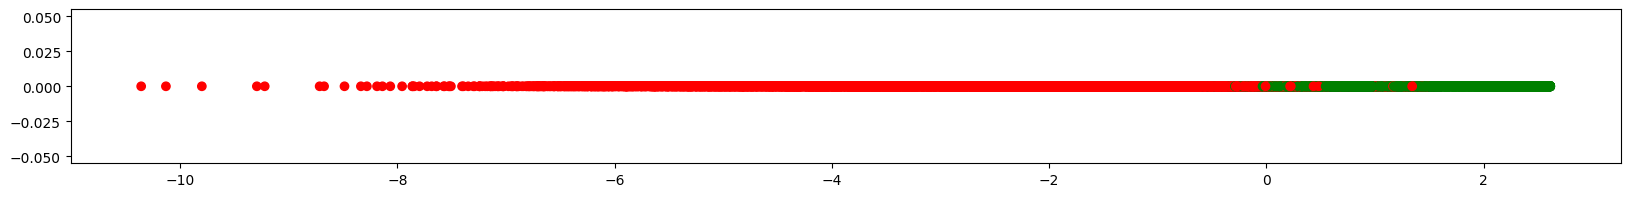

In [47]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(data['PVI'], np.zeros(len(data["PVI"])), c=data['correct_yx'].map(colors))

plt.show()

<Figure size 15360x11520 with 0 Axes>

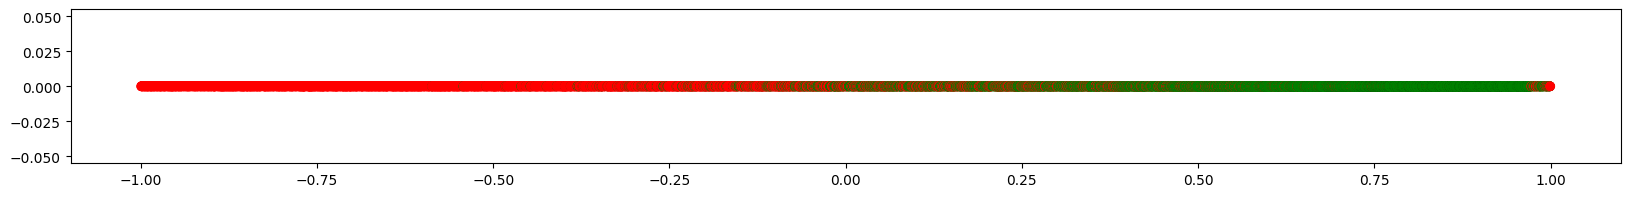

In [59]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(filtered_data3['PVI'], np.zeros(len(filtered_data3["PVI"])), c=filtered_data3['correct_yx'].map(colors))

plt.show()

dev

<Figure size 15360x11520 with 0 Axes>

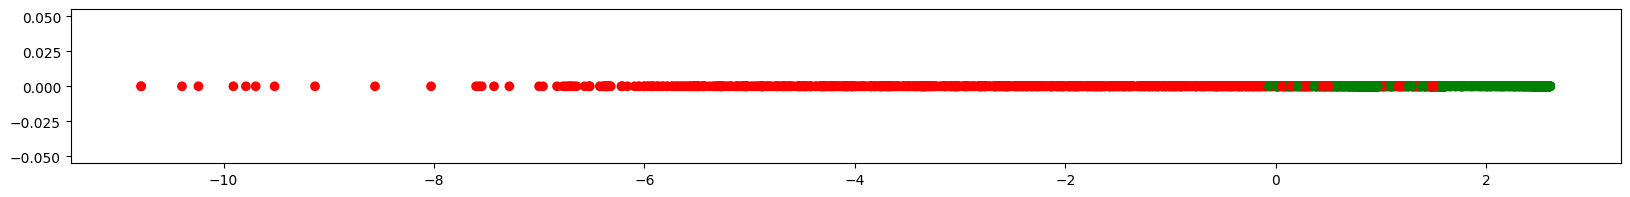

In [72]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(data['PVI'], np.zeros(len(data["PVI"])), c=data['correct_yx'].map(colors))

plt.show()

<Figure size 15360x11520 with 0 Axes>

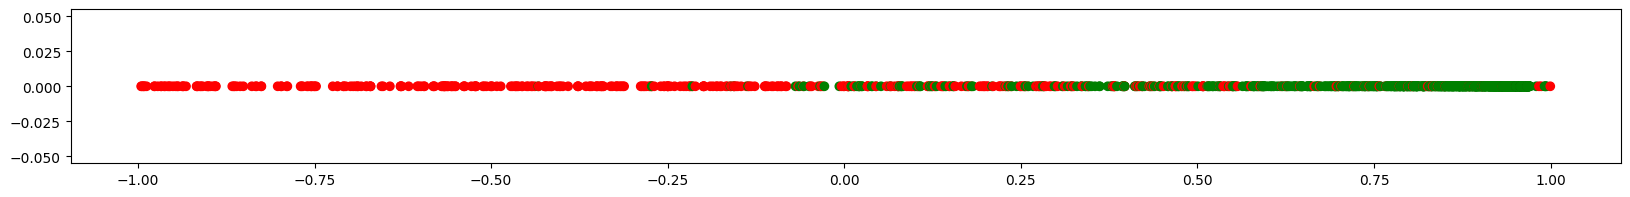

In [73]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(filtered_data3['PVI'], np.zeros(len(filtered_data3["PVI"])), c=filtered_data3['correct_yx'].map(colors))

plt.show()

test

<Figure size 15360x11520 with 0 Axes>

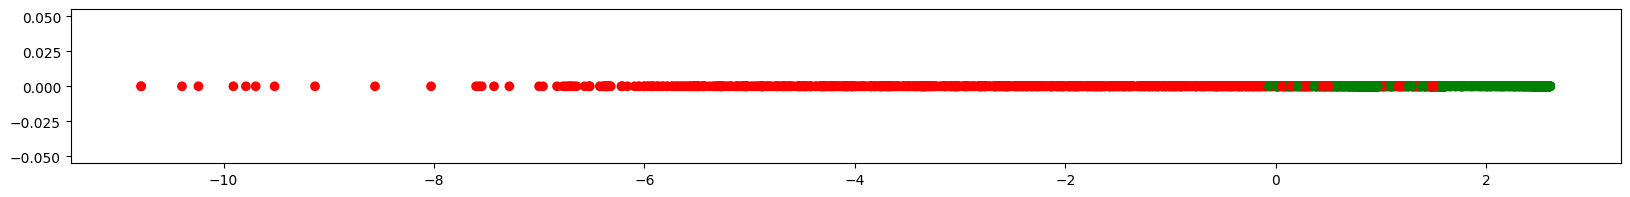

In [83]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(data['PVI'], np.zeros(len(data["PVI"])), c=data['correct_yx'].map(colors))

plt.show()

<Figure size 15360x11520 with 0 Axes>

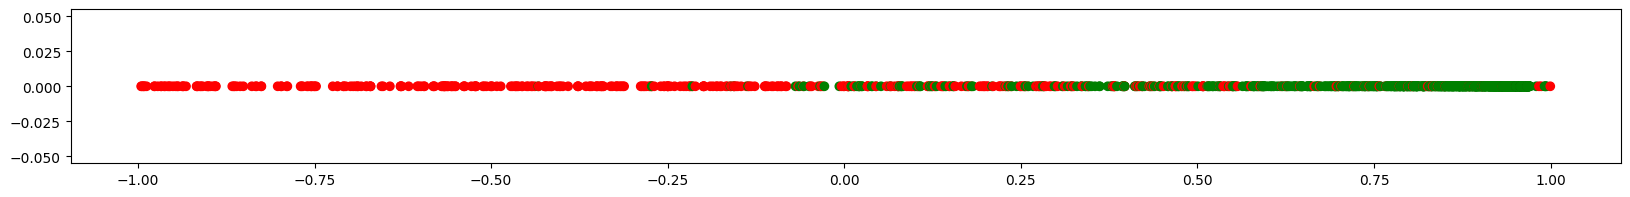

In [84]:
plt.figure(dpi=2400)
fig = plt.figure(figsize=(20,2))
ax = fig.add_subplot()

colors = {True:'green', False:'red'}


ax.scatter(filtered_data3['PVI'], np.zeros(len(filtered_data3["PVI"])), c=filtered_data3['correct_yx'].map(colors))

plt.show()

### Plot Dependency of PVI on predicted score + correlation

In [19]:
def plot_scatter(x, y, c, figsize=(5,5), dpi=2400):
    plt.figure(dpi=dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    colors = {True:'green', False:'red'}


    ax.scatter(x, y, c=c.map(colors))

    plt.show()

train

<Figure size 15360x11520 with 0 Axes>

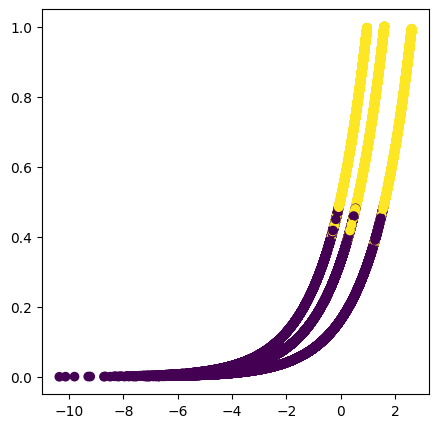

In [6]:
plot_scatter(train_data["PVI"], train_data["predicted_score"], train_data['correct_yx'])

dev

test

<Figure size 15360x11520 with 0 Axes>

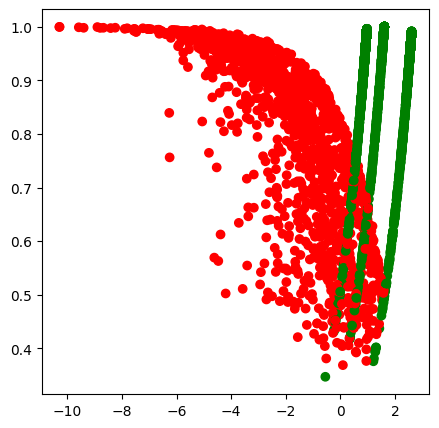

In [20]:
plot_scatter(test_data["PVI"], test_data["predicted_score"], test_data['correct_yx'])

## Analysis with anotated data

### Concat train and dev split (annotated data were chosen from them)

In [88]:
train_dev_data = pd.concat([train_data, dev_data])

In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118950 entries, 0 to 118949
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       118950 non-null  int64  
 1   id               118950 non-null  int64  
 2   label            118950 non-null  int64  
 3   claim            118950 non-null  object 
 4   evidence         118950 non-null  object 
 5   sentence1        118950 non-null  object 
 6   sentence2        118950 non-null  object 
 7   H_yb             118950 non-null  float64
 8   H_yx             118950 non-null  float64
 9   correct_yx       118950 non-null  bool   
 10  predicted_label  118950 non-null  int64  
 11  predicted_score  118950 non-null  float64
 12  PVI              118950 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 11.0+ MB


In [94]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7458 non-null   int64  
 1   id               7458 non-null   int64  
 2   label            7458 non-null   int64  
 3   claim            7458 non-null   object 
 4   evidence         7458 non-null   object 
 5   sentence1        7458 non-null   object 
 6   sentence2        7458 non-null   object 
 7   H_yb             7458 non-null   float64
 8   H_yx             7458 non-null   float64
 9   correct_yx       7458 non-null   bool   
 10  predicted_label  7458 non-null   int64  
 11  predicted_score  7458 non-null   float64
 12  PVI              7458 non-null   float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 706.6+ KB


In [92]:
train_dev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126408 entries, 0 to 7457
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       126408 non-null  int64  
 1   id               126408 non-null  int64  
 2   label            126408 non-null  int64  
 3   claim            126408 non-null  object 
 4   evidence         126408 non-null  object 
 5   sentence1        126408 non-null  object 
 6   sentence2        126408 non-null  object 
 7   H_yb             126408 non-null  float64
 8   H_yx             126408 non-null  float64
 9   correct_yx       126408 non-null  bool   
 10  predicted_label  126408 non-null  int64  
 11  predicted_score  126408 non-null  float64
 12  PVI              126408 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 12.7+ MB


### Remap values

In [95]:
label_dict = {0: "SUPPORTS",
              1: "REFUTES",
              2: "NOT ENOUGH INFO"}

In [96]:
remaped_data = train_dev_data.replace({"predicted_label": label_dict})

In [101]:
remaped_data

,Unnamed: 0,id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,55231,1,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,2.620849,0.050512,True,REFUTES,0.965593,2.570337
1,1,225400,2,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,1.603840,0.000850,True,NOT ENOUGH INFO,0.999411,1.602990
2,2,184972,0,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",0.975885,0.046157,True,SUPPORTS,0.968513,0.929728
3,3,208571,0,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...","Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...",0.975885,0.005154,True,SUPPORTS,0.996434,0.970731
4,4,100075,2,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",1.603840,0.121568,True,NOT ENOUGH INFO,0.919188,1.482272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,7453,172480,2,Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",1.603840,0.306210,True,NOT ENOUGH INFO,0.808763,1.297629
7454,7454,216396,2,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,1.603840,0.000993,True,NOT ENOUGH INFO,0.999312,1.602846
7455,7455,196982,2,Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",1.603840,0.000523,True,NOT ENOUGH INFO,0.999637,1.603316
7456,7456,173497,2,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,1.603840,0.001806,True,NOT ENOUGH INFO,0.998749,1.602034


In [106]:
remaped_data.rename({"id":"fever_id"}, axis=1, inplace=True)

In [107]:
remaped_data

,Unnamed: 0,fever_id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI
0,0,55231,1,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...,2.620849,0.050512,True,REFUTES,0.965593,2.570337
1,1,225400,2,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...,1.603840,0.000850,True,NOT ENOUGH INFO,0.999411,1.602990
2,2,184972,0,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y...",0.975885,0.046157,True,SUPPORTS,0.968513,0.929728
3,3,208571,0,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...","Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r...",0.975885,0.005154,True,SUPPORTS,0.996434,0.970731
4,4,100075,2,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc...",1.603840,0.121568,True,NOT ENOUGH INFO,0.919188,1.482272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,7453,172480,2,Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",Matteo Renzi je Žid.,"Matteo Renzi. Matteo Renzi (* 11. ledna 1975, ...",1.603840,0.306210,True,NOT ENOUGH INFO,0.808763,1.297629
7454,7454,216396,2,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,Homer Hickman napsal pět nejprodávanějších mem...,Homerova definice. Homerova definice (v anglic...,1.603840,0.000993,True,NOT ENOUGH INFO,0.999312,1.602846
7455,7455,196982,2,Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",Diwali duchovně znamená světlo nad temnotou.,"Sedmá věž. Sedmá věž (anglicky ""The Seventh To...",1.603840,0.000523,True,NOT ENOUGH INFO,0.999637,1.603316
7456,7456,173497,2,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,Sancho Panza je postava z Jany Eyrové.,Zmoudření dona Quijota. Zmoudření Dona Quijota...,1.603840,0.001806,True,NOT ENOUGH INFO,0.998749,1.602034


### Load annotated data

In [99]:
annotated_data = pd.read_csv("data/annotated_fcheck/fever_pair_1%_annotated.csv", delimiter=";")

In [111]:
annotated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1283 non-null   int64  
 1   fever_id     1283 non-null   int64  
 2   claim        1283 non-null   object 
 3   claim_cs     1283 non-null   object 
 4   evidence     1283 non-null   object 
 5   evidence_cs  1283 non-null   object 
 6   label        1283 non-null   object 
 7   label_cs     1283 non-null   object 
 8   checked_by   1283 non-null   int64  
 9   created_at   0 non-null      float64
 10  updated_at   1283 non-null   int64  
 11  random       0 non-null      float64
dtypes: float64(2), int64(4), object(6)
memory usage: 120.4+ KB


In [100]:
annotated_data.head()

,id,fever_id,claim,claim_cs,evidence,evidence_cs,label,label_cs,checked_by,created_at,updated_at,random
0,1,20036,Paul McCartney is a two-time inductee into the...,Paul McCartney byl dvakrát uveden do Rock'n'ro...,"[[""Paul McCartney"", 9]]","{""Paul McCartney"": ""Sir James Paul McCartney C...",SUPPORTS,MISTRANSLATED,350,NaN,1676294555,NaN
1,2,17792,Warren Buffett is a philanthropist.,Warren Buffett je filantrop.,"[[""Warren Buffett"", 0]]","{""Warren Buffett"": ""Warren Edward Buffett, \n\...",SUPPORTS,SUPPORTS,350,NaN,1676549803,NaN
2,3,72323,Woody Allen has won four Oscars.,Woody Allen získal čtyři Oscary.,"[[""Woody Allen"", 17], [""Oscar"", 0]]","{""Oscar"": ""Oscar, jinak také Cena Akademie (an...",SUPPORTS,SUPPORTS,350,NaN,1676293747,NaN
3,4,41890,Cells are fundamental units of structure and f...,Buňky jsou základní jednotky struktury a funkce.,"[[""Buňka"", 12]]","{""Buňka"": ""Buňka (lat. \""cellula\"") je základn...",SUPPORTS,SUPPORTS,350,NaN,1676550363,NaN
4,5,58083,Batman is exceptionally unintelligent.,Batman je výjimečně neinteligentní.,"[[""Batman"", 11]]","{""Batman"": ""Batman je komiksová postava, stvoř...",REFUTES,REFUTES,350,NaN,1676468199,NaN


### Merge human_labels

In [113]:
merged_data = pd.merge(remaped_data, annotated_data[["fever_id", "label_cs"]], on="fever_id", how="inner")

In [114]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1421 non-null   int64  
 1   fever_id         1421 non-null   int64  
 2   label            1421 non-null   int64  
 3   claim            1421 non-null   object 
 4   evidence         1421 non-null   object 
 5   sentence1        1421 non-null   object 
 6   sentence2        1421 non-null   object 
 7   H_yb             1421 non-null   float64
 8   H_yx             1421 non-null   float64
 9   correct_yx       1421 non-null   bool   
 10  predicted_label  1421 non-null   object 
 11  predicted_score  1421 non-null   float64
 12  PVI              1421 non-null   float64
 13  label_cs         1421 non-null   object 
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 156.8+ KB


In [115]:
merged_data

,Unnamed: 0,fever_id,label,claim,evidence,sentence1,sentence2,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,label_cs
0,232,31047,0,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
1,26640,31047,0,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
2,55985,31047,0,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
3,82485,31047,0,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
4,90146,31047,0,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,"Středozemě je oblast, odkud pochází Gimli.",Gimli. Gimli (narozen 2879 Třetího věku) je tr...,0.975885,0.009571,True,SUPPORTS,0.993388,0.966315,SUPPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,7146,131728,1,Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",Gal Gadot byla zařazena za Shlomit Malka jako ...,"Gal Gadotová. Gal Gadotová (Gal Gadot-Varsano,...",2.620849,3.173840,False,SUPPORTS,0.110810,-0.552990,NOT ENOUGH INFO
1417,7262,139714,1,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,Star Trek: Discovery je prequel ke knihám.,Star Trek. Star Trek je americká mediální řada...,2.620849,7.499454,False,NOT ENOUGH INFO,0.005526,-4.878605,NOT ENOUGH INFO
1418,7372,119516,0,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,Bret Easton Ellis napsal scénář.,Bret Easton Ellis. Bret Easton Ellis (* 7. bře...,0.975885,0.119395,True,SUPPORTS,0.920573,0.856490,NOT ENOUGH INFO
1419,7400,9718,0,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,Leonard Nimoy namluvil počítačovou hru.,Leonard Nimoy. Leonard Simon Nimoy (26. března...,0.975885,0.021641,True,SUPPORTS,0.985112,0.954244,SUPPORTS


### Compute and plot correlation

correlation between mislabeled (from human_labels) and PVI

## Deleted data analysis using PVI

### mark which were deleted

### investigate their PVI's (possibly plot)